In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from PIL import Image
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
%matplotlib inline

e:\ProgramsInstalled\Anaconda\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
e:\ProgramsInstalled\Anaconda\lib\site-packages\flask\json\__init__.py:31: DeprecationWarning: Importing 'itsdangerous.json' is deprecated and will be removed in ItsDangerous 2.1. Use Python's 'json' module instead.
  _slash_escape = "\\/" not in _json.dumps("/")
e:\ProgramsInstalled\Anaconda\lib\site-packages\flask\json\__init__.py:61: DeprecationWarning: Importing 'itsdangerous.json' is deprecated and will be removed in ItsDangerous 2.1. Use Python's 'json' module instead.
  class JSONEncoder(_json.JSONEncoder):
e:\ProgramsInstalled\Anaconda\lib\site-packages\flask\json\__init__.py:103: DeprecationWarning: Importing 'itsdangerous.json' is deprecated and will be removed in ItsDangerous 2.1. Use Python's 'json' module instead.
  class JSONDecoder(_json.JSONDecoder):

In [2]:
asos_df = pd.read_csv("ASOS_Trustpilot_13.csv", encoding= 'unicode_escape')
print(asos_df.head())

             Name               Date                           Review_Title  \
0        wezwilde   January 03, 2023                      Where do I start?   
1   Jordan Ankers   January 04, 2023  Worst customer service and courier??   
2             Sum   January 03, 2023                        DO NOT USE ASOS   
3    Tracey Young  December 20, 2022                       Terrible service   
4  adam saumtally  December 28, 2022                     Absolutely rubbish   

                                         Review_Text Location  \
0  Where do I start?Moneque in livechat / custome...       GB   
1  Worst customer service and courier service in ...       GB   
2  I cannot believe ASOS have hired Evri as a cou...       GB   
3  Terrible service. Never received parcel that w...       GB   
4  Absolutely rubbish. Poor customer service. Tel...       GB   

                   Rating  
0  Rated 1 out of 5 stars  
1  Rated 1 out of 5 stars  
2  Rated 1 out of 5 stars  
3  Rated 1 out of 5 st

In [3]:
asos_df.Date=asos_df.Date.apply(pd.to_datetime, errors ='coerce')

asos_df["month"]=asos_df.Date.dt.month
asos_df["year"]=asos_df.Date.dt.year

asos_df.drop("Date", axis=1, inplace=True)

In [4]:
asos_df.head()

,Name,Review_Title,Review_Text,Location,Rating,month,year
0,wezwilde,Where do I start?,Where do I start?Moneque in livechat / custome...,GB,Rated 1 out of 5 stars,1,2023
1,Jordan Ankers,Worst customer service and courier??,Worst customer service and courier service in ...,GB,Rated 1 out of 5 stars,1,2023
2,Sum,DO NOT USE ASOS,I cannot believe ASOS have hired Evri as a cou...,GB,Rated 1 out of 5 stars,1,2023
3,Tracey Young,Terrible service,Terrible service. Never received parcel that w...,GB,Rated 1 out of 5 stars,12,2022
4,adam saumtally,Absolutely rubbish,Absolutely rubbish. Poor customer service. Tel...,GB,Rated 1 out of 5 stars,12,2022


In [8]:

year = asos_df['year'].value_counts()
year_list = year.index

fig = go.Figure(data=[go.Pie(labels=year_list[:10], values=year.sort_values(ascending=False).iloc[:10], textinfo='label+percent', 
    marker_colors=['#FFD700', '#FF8C00', '#FF0000', '#F08080', '#CD5C5C', '#87CEFA', '#4169E1', '#0000FF', '#00BFFF', '#008000'])]) 
fig.update_layout(
    title={
        'text': "Negative Review Year Distribution",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'middle'
    },
    legend={
        'x': 0.75,
        'y': 0.5,
        'xanchor': 'center',
        'yanchor': 'middle'
    }
)
fig.update_yaxes(automargin=True)
fig.show()

e:\ProgramsInstalled\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

e:\ProgramsInstalled\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [9]:

Loc = asos_df['Location'].value_counts()
loc_list = Loc.index

fig = go.Figure(data=[go.Pie(labels=loc_list[:10], values=Loc.sort_values(ascending=False).iloc[:10], textinfo='label+percent', 
    marker_colors=['#FFD700', '#FF8C00', '#FF0000', '#F08080', '#CD5C5C', '#87CEFA', '#4169E1', '#0000FF', '#00BFFF', '#008000'])]) 
fig.update_layout(
    title={
        'text': "Negative Review Location Distribution",
        'x': 0.55,
        'y': 0.05,
        'xanchor': 'center',
        'yanchor': 'middle'
    },
    legend={
        'x': 1,
        'y': 0.5,
        'xanchor': 'center',
        'yanchor': 'middle'
    },
    width=800,
    height=600
)
fig.update_yaxes(automargin=True)
fig.show()

e:\ProgramsInstalled\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

e:\ProgramsInstalled\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



e:\ProgramsInstalled\Anaconda\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

e:\ProgramsInstalled\Anaconda\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

e:\ProgramsInstalled\Anaconda\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

e:\ProgramsInstalled\Anaconda\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

e:\ProgramsInstalled\Anaconda\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textl

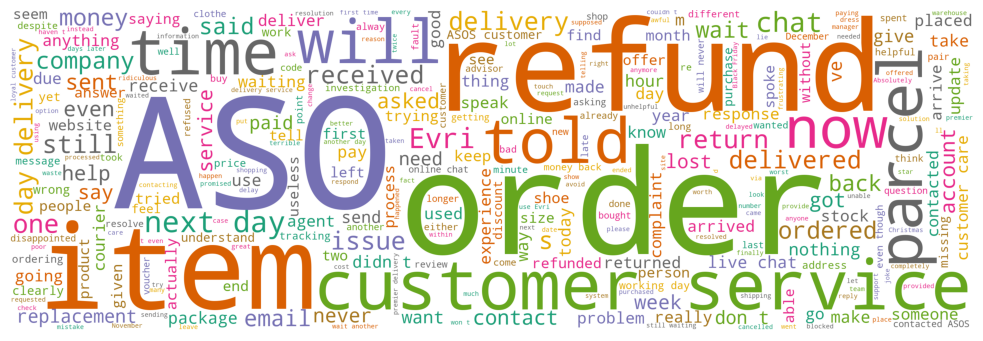

In [10]:
# process review data to txt
asos_df['Review_Text']=asos_df['Review_Text'].astype('str')
Reviews_Text = " ".join(txt for txt in asos_df.Review_Text)

# draw the word cloud
wc = WordCloud(background_color = 'white', mode = 'RGB',
               width = 3000, max_words = 300, height = 1000,
                contour_width = 2, contour_color = 'black',colormap = 'Dark2')
wc.generate(Reviews_Text)

# plot the figure
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [11]:
stopword = stopwords.words("english")
disney_stopwords = ['ASOS', 'asos', 'order', 'item']


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))


def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in disney_stopwords] for doc in texts]


def clean_topic(data):
    cleaned_data = data.Review_Text.values.tolist()
    cleaned_data = [re.sub('\S*@\S*\s?', '', sent) for sent in cleaned_data]
    cleaned_data = [re.sub('\s+', ' ', sent) for sent in cleaned_data]
    cleaned_data = [re.sub("\'", "", sent) for sent in cleaned_data]
    cleaned_data = list(sent_to_words(cleaned_data))
    cleaned_data = remove_stopwords(cleaned_data)

    return cleaned_data


<>:17: DeprecationWarning:

invalid escape sequence \S

<>:18: DeprecationWarning:

invalid escape sequence \s

<>:17: DeprecationWarning:

invalid escape sequence \S

<>:18: DeprecationWarning:

invalid escape sequence \s

C:\Users\annab\AppData\Local\Temp\ipykernel_16644\937531556.py:17: DeprecationWarning:

invalid escape sequence \S

C:\Users\annab\AppData\Local\Temp\ipykernel_16644\937531556.py:18: DeprecationWarning:

invalid escape sequence \s



In [12]:
# Define lemmatization

def lemmatization(texts, NLP, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = NLP(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def lda_m(data):
    data = clean_topic(data)
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    data = lemmatization(data, nlp, 
        allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    # Create Dictionary
    id2word = corpora.Dictionary(data)

    # Create Corpus
    texts = data

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
                                           
    doc_lda = lda_model[corpus]

    return lda_model, corpus, id2word, texts


In [13]:
def compute_coherence_values(dictionary, corpus, texts, start, stop):

    coherence_values = []
    model_list = []
    for num_topics in range(start, stop):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                              num_topics=num_topics,
                                              id2word=id2word,
                                              random_state=90,
                                              alpha='auto',
                                              eta='auto',
                                              per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts,
                             dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [19]:
lda_model, corpus, id2word, texts = lda_m(asos_df)

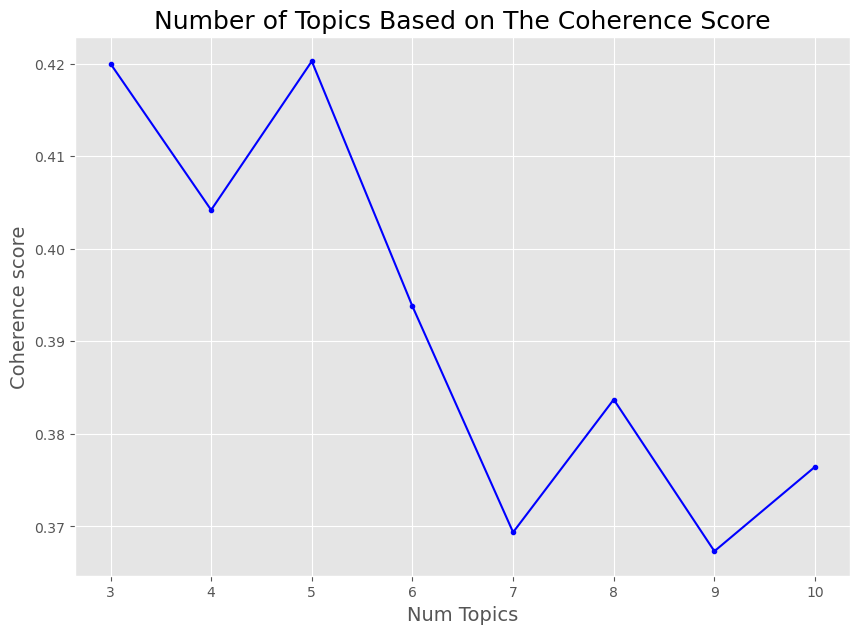

In [20]:
# Test the best number of topics
start = 3
stop = 11

model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                    corpus = corpus,
                                    texts = texts,
                                    start=start, stop=stop)

x = range(start, stop)
plt.figure(figsize=(10,7))
plt.style.use('ggplot')
plt.plot(x, coherence_values, color = "blue",marker=".")
plt.xlabel("Num Topics", size=14)
plt.ylabel("Coherence score", size=14)
plt.title('Number of Topics Based on The Coherence Score',size=18)
plt.show()

In [28]:
# Filter rows that contain the key word "discount" in the "Review_Text" column
asos_website = asos_df[asos_df['Review_Text'].str.contains('website')]

# Select all rows in the "Review_Text" column of the filtered dataframe
asos_website = asos_website.loc[:, 'Review_Text']

pd.options.display.max_colwidth = 500

# Print the new DataFrame
print(asos_website.to_string())

4       Absolutely rubbish. Poor customer service. Tell the same thing over and over again. Misleading also. ASOS puts on their website to encourage customers to pay for fastest delivery which doesn??t happen. I have been waiting for a parcel since 28th December as I selected the faster option and I am still waiting today 3/1/23. They items I ordered was clothing and shoes for a party on New Year??s Eve. It never arrived and I had to cancel my plans. They are an absolute joke. I will never order a...
24      Absolutely rubbish. Poor customer service. Tell the same thing over and over again. Misleading also. ASOS puts on their website to encourage customers to pay for fastest delivery which doesn??t happen. I have been waiting for a parcel since 28th December as I selected the faster option and I am still waiting today 3/1/23. They items I ordered was clothing and shoes for a party on New Year??s Eve. It never arrived and I had to cancel my plans. They are an absolute joke. I will n

In [18]:
# Select the row that contains the key word
website = asos_df[asos_df['Review_Text'].str.contains('discount')]

# Recreate the DataFrame from the selected row
asos_website = pd.DataFrame(website)

# Print the new DataFrame
asos_website

,Name,Review_Title,Review_Text,Location,Rating,month,year
126,N.,Avoid!,Just spent over 2 hours on live chat trying to...,GB,Rated 1 out of 5 stars,12,2022
136,Sofia Shepherd,Worst possible experience ever,Worst possible experience ever - messed up Xma...,GB,Rated 1 out of 5 stars,12,2022
142,Ori elkayam,Read the descreption. You should.,Over an hour of conversetion. No solution. Kee...,IL,Rated 1 out of 5 stars,12,2022
144,customer,always check your breakdown,I returned some items but received less money ...,GB,Rated 1 out of 5 stars,12,2022
150,Tara,ORDER NEVER RECEIVED,I placed an order on 14th of December for next...,IE,Rated 1 out of 5 stars,12,2022
...,...,...,...,...,...,...,...
1955,natalia baci,I have been waiting for 2 months for a??,I have been waiting for 2 months for a discoun...,US,Rated 1 out of 5 stars,10,2022
1982,Alzira castro,asos is not reliable,"I bought an item that is called ""adidas Origin...",PT,Rated 1 out of 5 stars,10,2022
2005,Lucy,Rubbish compensation for rubbish service,Had no helpful solutions and only compensation...,GB,Rated 1 out of 5 stars,10,2022
2017,Emily,"Awful customer service, just lost a loyal cust...",I have placed over 45 orders with ASOS and spe...,GB,Rated 1 out of 5 stars,10,2022


In [16]:
lda_model, corpus, id2word, texts = lda_m(asos_df)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

e:\ProgramsInstalled\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.313443  0.190274       1        1  72.203795
4      0.189651 -0.263209       2        1  13.425627
3     -0.150215  0.150212       3        1   7.133861
0     -0.210535 -0.027009       4        1   4.537088
2     -0.142343 -0.050268       5        1   2.699629, topic_info=           Term         Freq        Total Category  logprob  loglift
5           day  1560.000000  1560.000000  Default  30.0000  30.0000
23       return   623.000000   623.000000  Default  29.0000  29.0000
6      delivery  1073.000000  1073.000000  Default  28.0000  28.0000
18         next   661.000000   661.000000  Default  27.0000  27.0000
33         wait   663.000000   663.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
1404      stand     8.593069     9.338780   Topic5  -5.5329   3.5288
4183  helpfulno    13.255784    14.559232   Topic5  -5.0994   3.5183
96      similar    16.288322    20.289941   Topic5  -4.8934   3.3924
921      office    23.824041    63.409239   Topic5  -4.5132   2.6331
367        card    13.956148    77.468677   Topic5  -5.0479   1.8981

[234 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1551      5  0.968681  acceptable
168       4  0.994904     account
80        5  0.966585         act
578       4  0.989478     advisor
0         1  0.998725       again
...     ...       ...         ...
255       1  0.815489       wrong
255       3  0.180774       wrong
2636      2  0.977445      yearly
688       4  0.883220   yesterday
688       5  0.110403   yesterday

[247 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 1, 3])

In [17]:
lda_model1, corpus, id2word, texts = lda_m(asos_website)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model1, corpus, id2word)
vis

e:\ProgramsInstalled\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.201804  0.008028       1        1  53.569302
4     -0.175102  0.042215       2        1  37.209442
2      0.055437 -0.162852       3        1   5.713839
0      0.157214  0.064828       4        1   2.204632
1      0.164254  0.047780       5        1   1.302784, topic_info=            Term        Freq       Total Category  logprob  loglift
144       return  123.000000  123.000000  Default  30.0000  30.0000
142          pay   83.000000   83.000000  Default  29.0000  29.0000
324         send   99.000000   99.000000  Default  28.0000  28.0000
323          say  114.000000  114.000000  Default  27.0000  27.0000
29          take   86.000000   86.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
239         last    1.646973   28.078921   Topic5  -4.8876   1.5046
953       lovely    0.836793    2.570673   Topic5  -5.5647   3.2183
624   disconnect    0.998531    8.297696   Topic5  -5.3880   2.2232
1222    promptly    0.885474    4.575991   Topic5  -5.5082   2.6982
150         year    1.111621   38.680171   Topic5  -5.2807   0.7912

[330 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
36        1  0.218970    address
36        2  0.778562    address
352       2  0.921980     advice
260       1  0.958283     advise
305       1  0.852685    advisor
...     ...       ...        ...
150       2  0.749738       year
150       3  0.077559       year
150       5  0.025853       year
1012      1  0.423540  yesterday
1012      3  0.564720  yesterday

[463 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 1, 2])

In [18]:
# This code was adapted from https://www.kaggle.com/code/ahmedterry/disneyland-reviews-nlp-sentiment-analysis

review = asos_df['Review_Text'].drop_duplicates()
all_sentences = []

for word in review:
    all_sentences.append(word)

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)
#== 

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)
#== 
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
#== 
import spacy
nlp = spacy.load('en_core_web_lg')
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
#== 
df = pd.DataFrame(stem2)
df = df[0].value_counts()
#== 
df = df[:20,]
#== 
nlp = en_core_web_sm.load()
#====== 
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))
#======
nlp = spacy.load('en_core_web_sm') 
nlp.max_length = 2000000000000
#=====
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

In [80]:
import plotly.express as px
df6['Word'] = df6.Word.apply(lambda x: x.lower())

df6_top10 = df6.groupby("Entity").apply(lambda x: x.Word.value_counts().nlargest(10))
df6_top10 = df6_top10.reset_index()
df6_top10.columns = ["Entity", "Word", "count"]

fig = px.treemap(df6_top10, path=['Entity', 'Word'], values='count',
                 title='Top 10 frequent words in each Entity',
                 hover_data=['count'], height=800, width=1200)
fig.show()

e:\ProgramsInstalled\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

e:\ProgramsInstalled\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [71]:
df6['Entity'].value_counts()
negative= df6.groupby(['Entity']).size().to_frame('count').reset_index()
negative.sort_values(by='count', ascending=False)[:10]
fig = px.pie(negative, values='count', names='Entity')
fig.show()

e:\ProgramsInstalled\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

e:\ProgramsInstalled\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



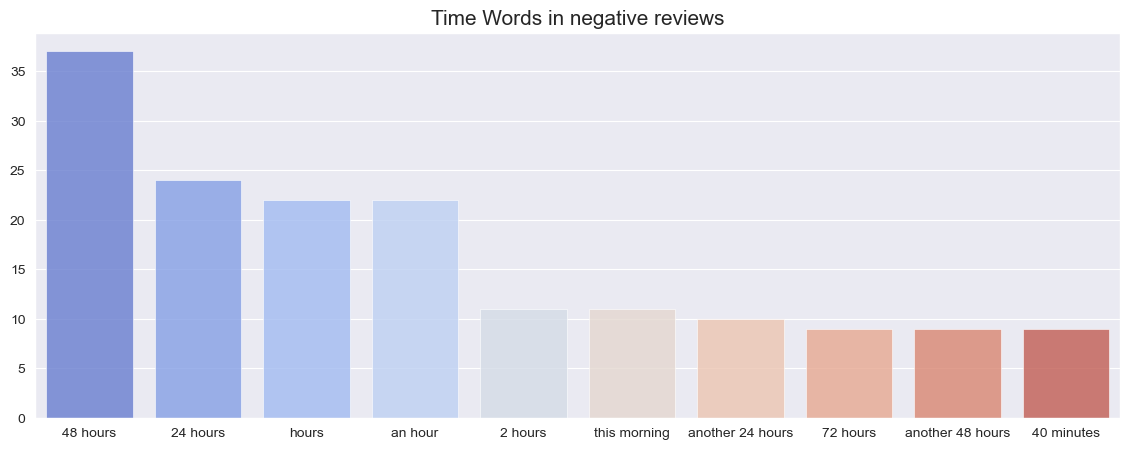

In [33]:
TIME = df6.query("Entity == 'TIME'")
TIME =TIME['Word'].value_counts()
TIME = TIME[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
TIME = sns.barplot(x=TIME.index,y= TIME.values, alpha=0.8,palette="coolwarm");
plt.title('Time Words in negative reviews',fontsize=15);
plt.show();

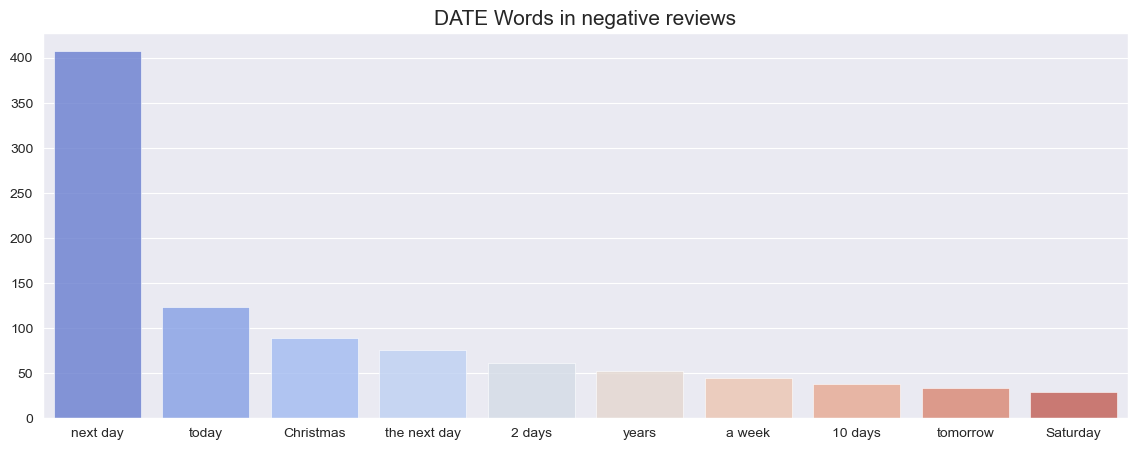

In [35]:
DATE = df6.query("Entity == 'DATE'")
DATE = DATE['Word'].value_counts()
DATE = DATE[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
DATE = sns.barplot(x=DATE.index,y= DATE.values, alpha=0.8,palette="coolwarm");
plt.title('DATE Words in negative reviews',fontsize=15);
plt.show();